<a href="https://colab.research.google.com/github/dymiyata/intro-to-ml-and-ai-2025-2026/blob/main/intro_to_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

Now that we know how to use pandas to work with dataframes the next important thing to talk about is being able to visualize the data.

Moreover, when we do machine learning, it's important for us to be able to visualize our results, especially if we're trying to show our results to others.

**Important Reminder**: If you decide to play around with this notebook, make sure you save a copy of this notebook to your own google drive.  Otherwise any changes you make won't be saved. You can do so by clicking

File -> Save a copy in Drive

## Importing Libaries

We begin by importing pandas in order to actually work with the data.

In [10]:
import pandas as pd

Next we import two new libraries.  
- Matplotlib: A comprehensive library for creating visualizations in Python
- Seaborn: A library built on top of matplotlib which abstracts away some of the complexity of working with Matplotlib. (It simplifies it for us).


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### The Dataset

Today we will work with a dataset of many flowers of a certain type.  This flower is called an *iris*.
- Each row is a specific iris with a bunch of measurements taken
- There are three species of iris in this dataset as we will see.

This dataset is included in the Seaborn library so we don't have to download anything to use it, we can simply load it with Seaborn.

(normally we will have to obtain a .csv file or something. Then manually load it in with pandas like we did with the pokemon dataset last week).



In [12]:
df = sns.load_dataset("iris")

If we want to do a rough overview of the dataset, what commands can we run?
Here are some questions we can try to answer:

- How many rows are there?
- What are the columns of the dataframe?
- What are the datatypes for each of the entries in the dataset?

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- What is the average `sepal_length`?

In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- What is the average `sepal_length` for just the `setosa` `species`

In [19]:
df[df["species"]=="setosa"].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


- What are the different species and how many of each are there?

In [20]:
df.value_counts("species")

,count
species,
setosa,50
versicolor,50
virginica,50


## Histograms

Who knows what a histogram is?

We can make a histogram to view the distribution of a single column in our dataframe.  Let's do so with the `petal_length` column.
- What does changing the number of bins do?
- What does `kde=True` do?
- What do you think about the shape of the distribution?
- Let's add the line `sns.set_theme()`

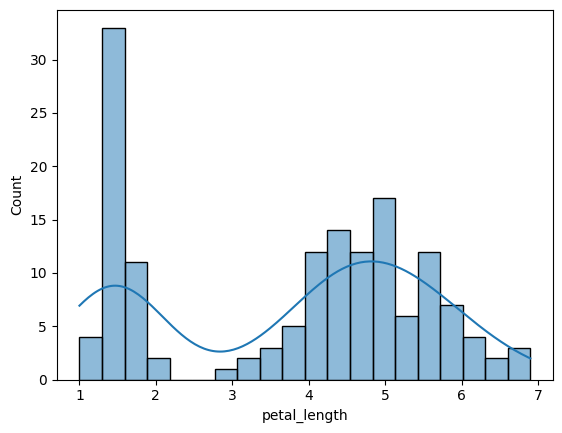

In [28]:
sns.histplot(df["petal_length"], bins=20, kde=True)
plt.show()


Let's add a title and some more appropriate labels to the axes.

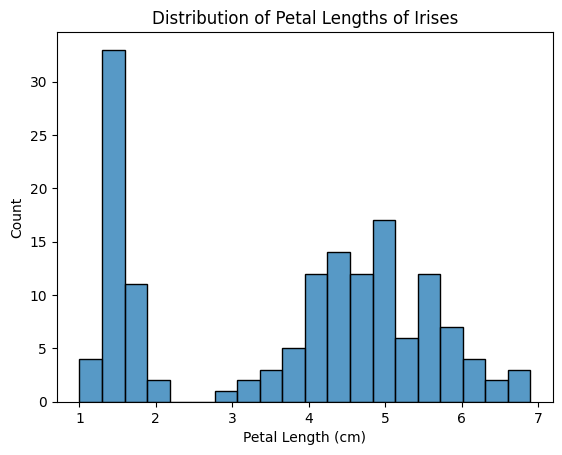

In [29]:
sns.histplot(df["petal_length"], bins=20)
plt.title("Distribution of Petal Lengths of Irises")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Count")
plt.show()

## Exploring Relationships Between Variables

Who knows what a scatter plot is?

Let's create a scatter plot exploring `petal_length` vs `petal_width`.

Any guesses for an overall trend?

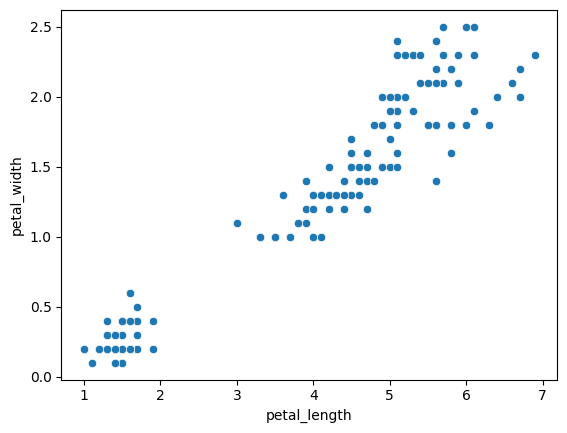

In [32]:
sns.scatterplot(x="petal_length", y="petal_width", data=df)
plt.show()

Notice some of the values seems to cluster together. Why might this be the case?

<Axes: xlabel='petal_length', ylabel='petal_width'>

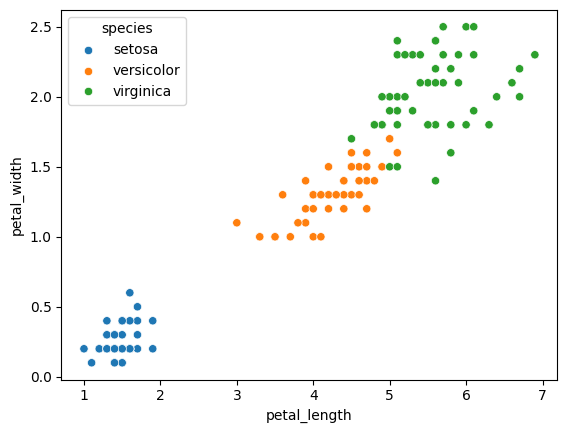

In [37]:

sns.scatterplot(x="petal_length", y="petal_width", data=df, hue="species") # ADD THE HUE PARAMETER

## Correlation

Trends between two quantitative variables can be measured using a value called the *correlation coefficiont* or just *correlation* usually denoted by the letter $r$.  

- It is always the case that
$$-1 \leq r \leq 1$$
- The closer $r$ is to $1$ or $-1$ the *stronger* the correlation.
- A positive $r$ value, means the data seems to have a positive slope
- A negative $r$ value, means the data seems to have a negative slope
- An $r$ value near 0 means there isn't a correlation between the two variables.

We can use `DataFrame.corr()` to explore the correlations between the variables. First we need to only keep the quantitative variables.


In [38]:
numerical_df = df.select_dtypes("number")
numerical_df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


We can use a heatmap to make this more visually appealing

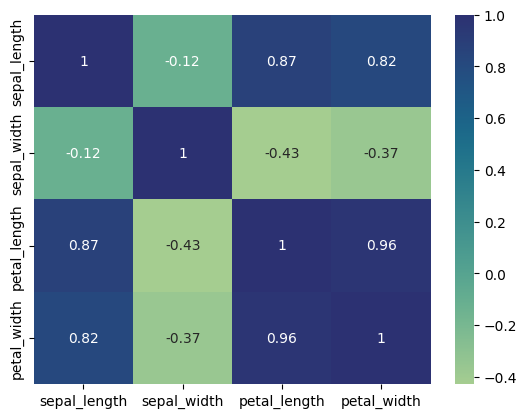

In [39]:
sns.heatmap(numerical_df.corr(), annot=True, cmap='crest')
plt.show()

Let's make a scatter plot with variables that seem strongly correlated.  Then another with variables that are less strongly correlated.

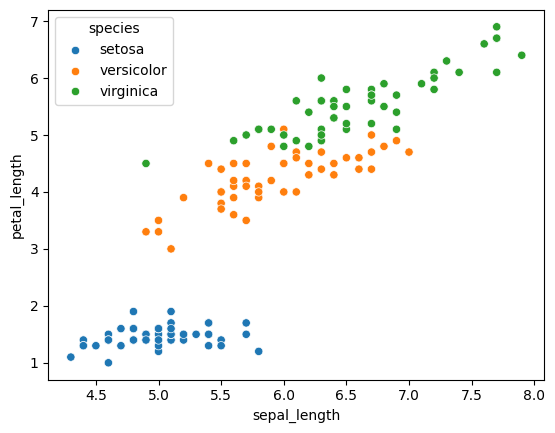

In [41]:
# Strong Correlation Here
sns.scatterplot(x="sepal_length", y="petal_length", data=df, hue="species")
plt.show()

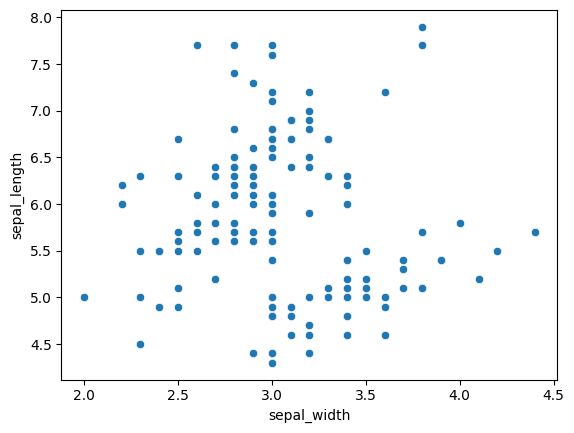

In [42]:
# Weak Correlation Here
sns.scatterplot(x="sepal_width", y="sepal_length", data=df)
plt.show()


Maybe `sepal_width` and `sepal_length` are not that correlated.  However, there still seems to be some *clutering*.  Maybe within a certain species they are correlated?

Let's explore this with the same plot, but we add colors to separate the different species using the argument `hue="species"`.

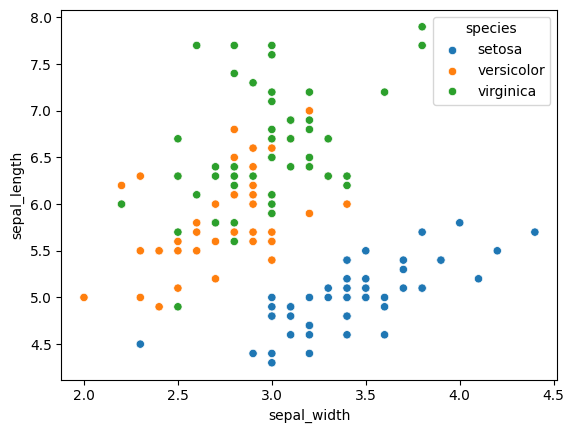

In [43]:

sns.scatterplot(x="sepal_width", y="sepal_length", data=df, hue="species")
plt.show()

In [45]:
df[df["species"]=="setosa"].select_dtypes("number").corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.742547,0.267176,0.278098
sepal_width,0.742547,1.000000,0.177700,0.232752
petal_length,0.267176,0.177700,1.000000,0.331630
petal_width,0.278098,0.232752,0.331630,1.000000


## Pair plots

Maybe we want scatterplots for all the pairs of numerical variables at once. We can do so with a *pair plot*.

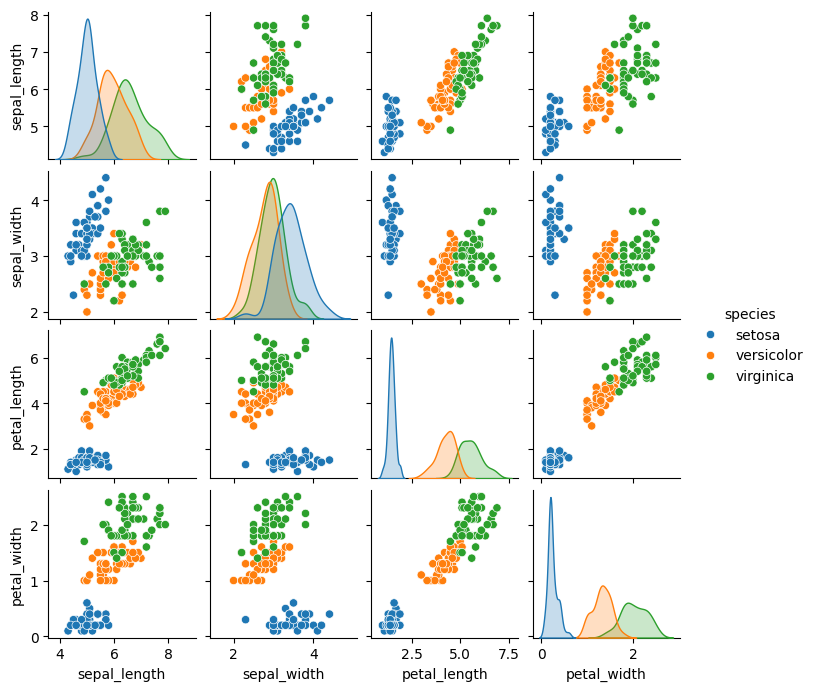

In [49]:
sns.pairplot(data=df, height=1.75, hue="species")
plt.show()

## Many Other Types of Plots to Explore

Here are just some random examples of other types of plots you can make with Seaborn.  There's too much to go over everything in depth, so feel free to play around with things to explore what's possible.

<Axes: xlabel='species', ylabel='count'>

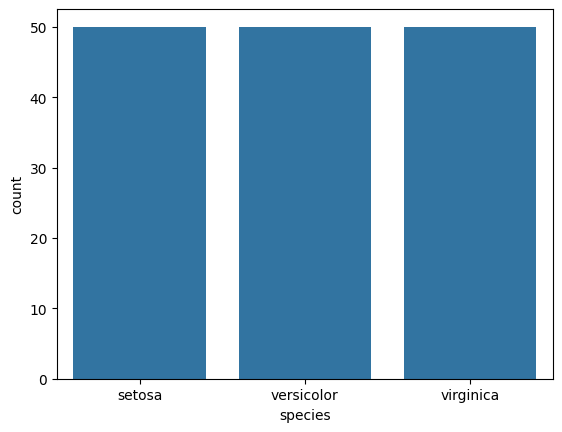

In [51]:
sns.countplot(x="species", data=df)

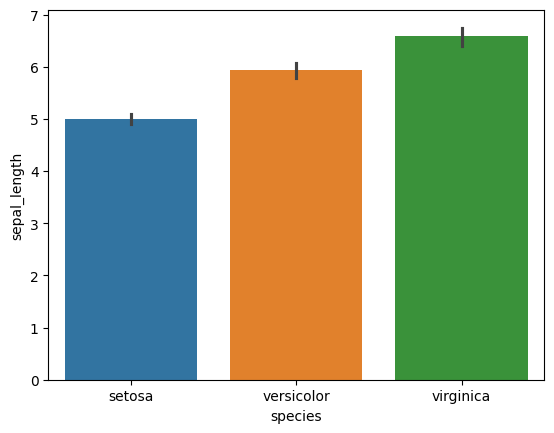

In [52]:
sns.barplot(x="species", y="sepal_length", data=df, hue="species")
plt.show()

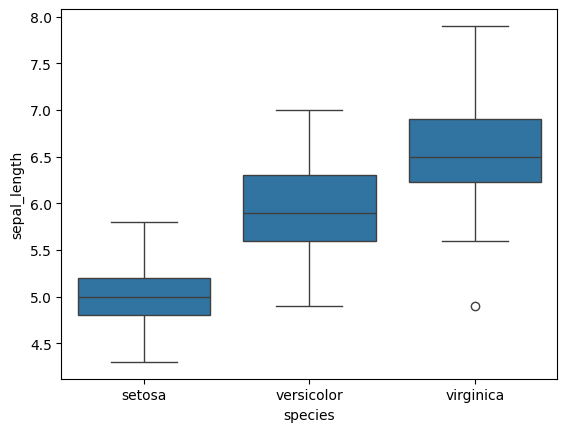

In [53]:
sns.boxplot(x="species", y="sepal_length", data=df)
plt.show()

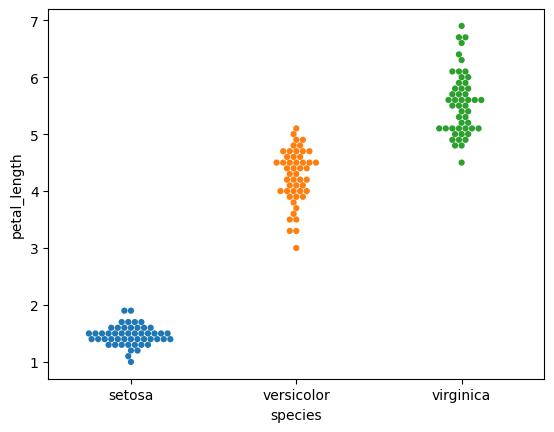

In [54]:
sns.swarmplot(x="species", y="petal_length", data=df, hue="species", size=4.5)
plt.show()

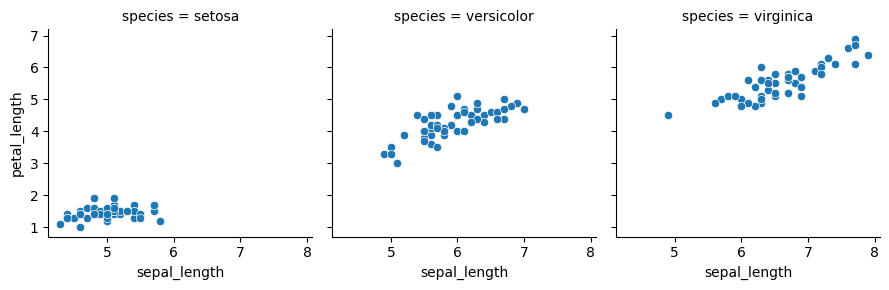

In [55]:
grid = sns.FacetGrid(df, col="species")
grid.map_dataframe(sns.scatterplot, x="sepal_length", y="petal_length")
plt.show()

There are many more types of plots, so feel free to explore the Seaborn documentation to see more.

## Trends and Patterns

Notice by plotting the data we can begin to see many trends in the data.
It seems that if we know some information about an iris, we can predict other information about it.

- For example, if we know the `petal_width` maybe we can *predict* the `petal_length`.  

- Or even better, if we know `petal_width`, `petal_length`, `sepal_width` and `sepal_length` perhaps we can *predict* what `species` of iris it is.  

In the future weeks we will finally start to do some *actual* machine learning to train a computer to learn these patterns in order to be able to make these predictions.

We will begin with (multi) linear regression.  Here's a preview:

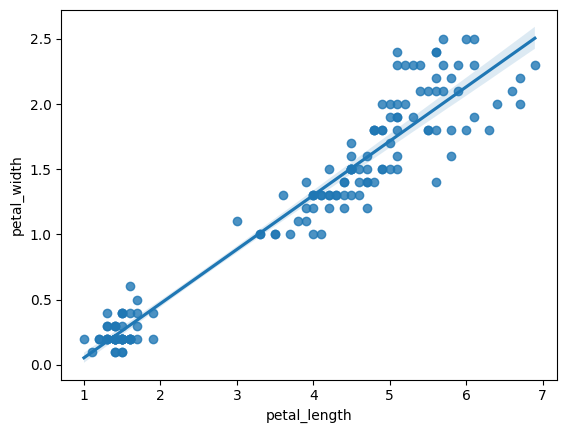

In [56]:
sns.regplot(x="petal_length", y="petal_width", data=df)
plt.show()